In [ ]:
!pip3 install torch==1.0.1 -f https://download.pytorch.org/whl/cpu/stable 
!git clone https://github.com/huggingface/torchMoji
import os
os.chdir('torchMoji')
!pip3 install -e .
#if you restart the package, the notebook risks to crash on a loop
#I did not restart and worked fine

Looking in links: https://download.pytorch.org/whl/cpu/stable
     |████████████████████████████████| 560.1MB 22kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.0.1 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
Cloning into 'torchMoji'...
remote: Enumerating objects: 143, done.
remote: Total 143 (delta 0), reused 0 (delta 0), pack-reused 143
Receiving objects: 100% (143/143), 2.41 MiB | 1.99 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Obtaining file:///content/torchMoji
     |████████████████████████████████| 17.0MB 219kB/s 
     |████████████████████████████████| 48.2MB 126kB/s 
     |████████████████████████████████| 12.4MB 24.1MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
  Created wheel for emoji: filename=emoji-0.4.5-cp36-none-any.whl size=38201 sha256=78547a3252eca029e1b8cb2896682b57ecba7310b32b509e2439a3559e

In [ ]:
!python3 scripts/download_weights.py

About to download the pretrained weights file from https://www.dropbox.com/s/q8lax9ary32c7t9/pytorch_model.bin?dl=0#
The size of the file is roughly 85MB. Continue? [y/n]
y
Downloading...
Running system call: wget https://www.dropbox.com/s/q8lax9ary32c7t9/pytorch_model.bin?dl=0# -O /content/torchMoji/model/pytorch_model.bin
--2021-02-13 11:28:44--  https://www.dropbox.com/s/q8lax9ary32c7t9/pytorch_model.bin?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/q8lax9ary32c7t9/pytorch_model.bin [following]
--2021-02-13 11:28:45--  https://www.dropbox.com/s/raw/q8lax9ary32c7t9/pytorch_model.bin
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9701bd072fcbaac11bfb5571bf.dl.dropboxusercontent.com/cd/0/inline/BI2Dykh6f8tr

In [ ]:
pip install torchmoji

ERROR: Could not find a version that satisfies the requirement torchmoji (from versions: none)
ERROR: No matching distribution found for torchmoji


In [ ]:
import numpy as np
import emoji, json
from torchmoji.global_variables import PRETRAINED_PATH, VOCAB_PATH
from torchmoji.sentence_tokenizer import SentenceTokenizer
from torchmoji.model_def import torchmoji_emojis
  
EMOJIS = ":joy: :unamused: :weary: :sob: :heart_eyes: :pensive: :ok_hand: :blush: :heart: :smirk: :grin: :notes: :flushed: :100: :sleeping: :relieved: :relaxed: :raised_hands: :two_hearts: :expressionless: :sweat_smile: :pray: :confused: :kissing_heart: :heartbeat: :neutral_face: :information_desk_person: :disappointed: :see_no_evil: :tired_face: :v: :sunglasses: :rage: :thumbsup: :cry: :sleepy: :yum: :triumph: :hand: :mask: :clap: :eyes: :gun: :persevere: :smiling_imp: :sweat: :broken_heart: :yellow_heart: :musical_note: :speak_no_evil: :wink: :skull: :confounded: :smile: :stuck_out_tongue_winking_eye: :angry: :no_good: :muscle: :facepunch: :purple_heart: :sparkling_heart: :blue_heart: :grimacing: :sparkles:".split(' ')
model = torchmoji_emojis(PRETRAINED_PATH)
with open(VOCAB_PATH, 'r') as f:
    vocabulary = json.load(f)
st = SentenceTokenizer(vocabulary, 30)
def deepmojify(sentence,top_n =5):
    def top_elements(array, k):
        ind = np.argpartition(array, -k)[-k:]
        return ind[np.argsort(array[ind])][::-1]
tokenized, _, _ = st.tokenize_sentences([sentence])
prob = model(tokenized)[0]
emoji_ids = top_elements(prob, top_n)
emojis = map(lambda x: EMOJIS[x], emoji_ids)
return emoji.emojize(f"{sentence} {' '.join(emojis)}", use_aliases=True)

/content/torchMoji/torchmoji/model_def.py:159: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(self.embed.weight.data, a=-0.5, b=0.5)
/content/torchMoji/torchmoji/model_def.py:161: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(t)
/content/torchMoji/torchmoji/model_def.py:163: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  nn.init.orthogonal(t)
/content/torchMoji/torchmoji/model_def.py:165: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(t, 0)
/content/torchMoji/torchmoji/model_def.py:167: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.output_layer[0].weight.data)


NameError: ignored

In [ ]:
import numpy as np
import emoji, json
from torchmoji.global_variables import PRETRAINED_PATH, VOCAB_PATH
from torchmoji.sentence_tokenizer import SentenceTokenizer
from vv.model_def import torchmoji_emojis
  
EMOJIS = ":joy: :unamused: :weary: :sob: :heart_eyes: :pensive: :ok_hand: :blush: :heart: :smirk: :grin: :notes: :flushed: :100: :sleeping: :relieved: :relaxed: :raised_hands: :two_hearts: :expressionless: :sweat_smile: :pray: :confused: :kissing_heart: :heartbeat: :neutral_face: :information_desk_person: :disappointed: :see_no_evil: :tired_face: :v: :sunglasses: :rage: :thumbsup: :cry: :sleepy: :yum: :triumph: :hand: :mask: :clap: :eyes: :gun: :persevere: :smiling_imp: :sweat: :broken_heart: :yellow_heart: :musical_note: :speak_no_evil: :wink: :skull: :confounded: :smile: :stuck_out_tongue_winking_eye: :angry: :no_good: :muscle: :facepunch: :purple_heart: :sparkling_heart: :blue_heart: :grimacing: :sparkles:".split(' ')
model = torchmoji_emojis(PRETRAINED_PATH)
with open(VOCAB_PATH, 'r') as f:
  vocabulary = json.load(f)
st = SentenceTokenizer(vocabulary, 30)
def deepmojify(sentence,top_n =5):
  def top_elements(array, k):
    ind = np.argpartition(array, -k)[-k:]
    return ind[np.argsort(array[ind])][::-1]
  tokenized, _, _ = st.tokenize_sentences([sentence])
  prob = model(tokenized)[0]
  emoji_ids = top_elements(prob, top_n)
  emojis = map(lambda x: EMOJIS[x], emoji_ids)
  return emoji.emojize(f"{sentence} {' '.join(emojis)}", use_aliases=True)

/content/torchMoji/torchmoji/model_def.py:159: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  nn.init.uniform(self.embed.weight.data, a=-0.5, b=0.5)
/content/torchMoji/torchmoji/model_def.py:161: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(t)
/content/torchMoji/torchmoji/model_def.py:163: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  nn.init.orthogonal(t)
/content/torchMoji/torchmoji/model_def.py:165: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(t, 0)
/content/torchMoji/torchmoji/model_def.py:167: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.output_layer[0].weight.data)


In [ ]:
text = ['I hate coding AI']
for _ in text:
  print(deepmojify(_, top_n = 3))

I hate coding AI 😡 😠 😤


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving 20210228_df_corpus_II_DS_v1.xlsx to 20210228_df_corpus_II_DS_v1 (1).xlsx


In [ ]:
import pandas as pd
df_corpus = pd.read_excel("20210228_df_corpus_II_DS_v1.xlsx")

BadZipFile: ignored

In [ ]:
df = pd.read_excel(io.BytesIO(uploaded.get('20210228_df_corpus_II_DS_v1.xlsx')))

In [ ]:
df_corpus = df
df_corpus.head(3)

,Unnamed: 0,index,Newspaper,Date,Reviewer,Title,Theatre,Rating,Keywords,Review,Lat,Long,Year,Spectator_Cat,Audience_Cat,Show_Cat,Story_Cat,Decor_Cat,Theatre_Cat,Production_Cat,Character_Cat,End_Cat,Beginning_Cat,Max_Value,Cluster,Neg,Neu,Pos,Compound,Polarity,Subjectivity
0,0,0,A YOUNGER THEATER,2020-11-12,Jessica Handscomb,The Dumb Waiter,Hampstead Theatre,4.0,"Alec Newman,Alice Hamilton,Harold Pinter,James...",\nI think it’s fair to say that 2020 has been ...,51.543817,-0.173817,2020.0,0,1,4,2,0,4,1,1,5,2,5,End_Cat,0.123,0.776,0.102,-0.9582,0.067633,0.519686
1,1,1,A YOUNGER THEATER,2020-10-12,Jessica Handscomb,Mr Stink,Chickenshed Theatre,3.0,"Belinda McGuirk,Bethany Hamlin,Bradley Davis,C...",\nDavid Walliams is not my favourite children’...,51.644387,-0.145171,2020.0,0,2,2,2,0,2,1,3,3,1,3,Character_Cat,0.166,0.715,0.119,-0.9823,0.128100,0.495122
2,2,2,A YOUNGER THEATER,2020-08-12,Olivia Kiely,The Gruffalo’s Child,Tall Stories,3.0,"Alexandra Palace,Althea Burey,Andy Shaw,Axel S...",\nIt is fair to say that I’m a bit older than ...,51.549105,-0.107475,2020.0,1,1,5,1,0,3,2,1,0,1,5,Show_Cat,0.043,0.748,0.209,0.9985,0.241531,0.583156


In [ ]:
df_corpus

In [ ]:
yo = deepmojify(df_corpus["Review"][0], top_n = 3)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
df_corpus.shape

(14762, 17)

In [ ]:
df_corpus["Review"]

In [ ]:
df_corpus_2 = df_corpus.sample(1000).reset_index(drop=True)

In [ ]:
df_corpus_2.head(3)

,Newspaper,Date,Reviewer,Title,Theatre,Rating,Keywords,Review,Lat,Long,Year,Neg,Neu,Pos,Compound,Polarity,Subjectivity
0,EVERYTHING THEATER,2016-11-19,Maria Dimova,Princess,Lost Theatre,3.0,"dance, feminism, Festival of Feminism 2013, Je...",Cons: The ‘princess’ failed to connect with th...,51.475513,-0.131621,2016.0,0.037,0.841,0.122,0.9843,0.160773,0.528107
1,EVERYTHING THEATER,2014-07-01,Caitlin McDonald,Merely As You Like It,The Cockpit Theatre,4.0,"As You Like It, Ben Chamberlain, David Gerits,...",Cons: Sultry hot in the auditorium. Bring a fa...,51.524475,-0.169555,2014.0,0.030,0.717,0.252,0.9995,0.195467,0.598219
2,EVERYTHING THEATER,2014-02-08,Everything Theatre,Sun,St Leonard’s Church,3.0,"Slider, St Leonard's Church, Sun","Cons: Despite a well-written script, I persona...",51.616188,-0.220559,2014.0,0.062,0.801,0.137,0.9941,0.182435,0.487596


In [ ]:
df_corpus_2.shape

(1000, 17)

In [ ]:
import pandas as pd
def emoji_dataset(list1, n_emoji=3):
  emoji_list = [[x] for x in list1]
  for _ in range(len(list1)):
    for n_emo in range(1, n_emoji+1):
      emoji_list[_].append(deepmojify(list1[_], top_n = n_emoji)[2*-n_emo+1])
  emoji_list = pd.DataFrame(emoji_list)
  return emoji_list
list1 = list(df_corpus["Review"][0:1000])
df_emoji = emoji_dataset(list1, 5)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
df_emoji.shape

(1000, 6)

In [ ]:
df_emoji.head(3)

,0,1,2,3,4,5
0,\nI think it’s fair to say that 2020 has been ...,😕,😬,🙏,😷,👍
1,\nDavid Walliams is not my favourite children’...,😐,😬,😢,😕,😳
2,\nIt is fair to say that I’m a bit older than ...,😄,😊,😕,👍,🙅


In [ ]:
df_emoji[1]

0      😕
1      😐
2      😄
3      🙏
4      👊
      ..
995    😄
996    😕
997    😐
998    ❤
999    👌
Name: 1, Length: 1000, dtype: object

In [ ]:
df_corpus_v3 = df_corpus[0:1000]

In [ ]:
df_corpus_v3.shape

(1000, 17)

In [ ]:
df_corpus_v3["Sentiment_Emoticon_1"] = df_emoji[1]
df_corpus_v3["Sentiment_Emoticon_2"] = df_emoji[2]
df_corpus_v3["Sentiment_Emoticon_3"] = df_emoji[3]
df_corpus_v3["Sentiment_Emoticon_4"] = df_emoji[4]
df_corpus_v3["Sentiment_Emoticon_5"] = df_emoji[5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_corpus_v3.head(3)

,Newspaper,Date,Reviewer,Title,Theatre,Rating,Keywords,Review,Lat,Long,Year,Neg,Neu,Pos,Compound,Polarity,Subjectivity,Sentiment_Emoticon_1,Sentiment_Emoticon_2,Sentiment_Emoticon_3,Sentiment_Emoticon_4,Sentiment_Emoticon_5
0,A YOUNGER THEATER,2020-11-12,Jessica Handscomb,The Dumb Waiter,Hampstead Theatre,4.0,"Alec Newman,Alice Hamilton,Harold Pinter,James...",\nI think it’s fair to say that 2020 has been ...,51.543817,-0.173817,2020.0,0.123,0.776,0.102,-0.9582,0.067633,0.519686,😕,😬,🙏,😷,👍
1,A YOUNGER THEATER,2020-10-12,Jessica Handscomb,Mr Stink,Chickenshed Theatre,3.0,"Belinda McGuirk,Bethany Hamlin,Bradley Davis,C...",\nDavid Walliams is not my favourite children’...,51.644387,-0.145171,2020.0,0.166,0.715,0.119,-0.9823,0.128100,0.495122,😐,😬,😢,😕,😳
2,A YOUNGER THEATER,2020-08-12,Olivia Kiely,The Gruffalo’s Child,Tall Stories,3.0,"Alexandra Palace,Althea Burey,Andy Shaw,Axel S...",\nIt is fair to say that I’m a bit older than ...,51.549105,-0.107475,2020.0,0.043,0.748,0.209,0.9985,0.241531,0.583156,😄,😊,😕,👍,🙅


In [ ]:
pip install text2emotion

     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 133kB 14.7MB/s 


In [ ]:
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
test = "hello"

In [ ]:
te.get_emotion(text)

NameError: ignored

In [ ]:
text = "Day was pretty amazing😃😃"
te.get_emotion(text)

{'Angry': 0.0, 'Fear': 0.0, 'Happy': 0.8, 'Sad': 0.0, 'Surprise': 0.2}

In [ ]:
df_corpus_v3 = df_corpus

In [ ]:
list_emotion_angry = []
list_emotion_fear = []
list_emotion_happy = []
list_emotion_sad = []
list_emotion_surprise = []
for i in range(0,len(df_corpus_v3["Review"])):
  print(i)
  emotion =te.get_emotion(df_corpus_v3["Review"][i])
  list_emotion_angry.append(emotion["Angry"])
  list_emotion_fear.append(emotion["Fear"])
  list_emotion_happy.append(emotion["Happy"])
  list_emotion_sad.append(emotion["Sad"])
  list_emotion_surprise.append(emotion["Surprise"])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
9762
9763
9764
9765
9766
9767
9768
9769
9770
9771
9772
9773
9774
9775
9776
9777
9778
9779
9780
9781
9782
9783
9784
9785
9786
9787
9788
9789
9790
9791
9792
9793
9794
9795
9796
9797
9798
9799
9800
9801
9802
9803
9804
9805
9806
9807
9808
9809
9810
9811
9812
9813
9814
9815
9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
99

In [ ]:
list_emotion_surprise

[0.26,
 0.15,
 0.16,
 0.27,
 0.19,
 0.13,
 0.22,
 0.26,
 0.15,
 0.2,
 0.25,
 0.22,
 0.23,
 0.21,
 0.13,
 0.25,
 0.22,
 0.26,
 0.15,
 0.2]

In [ ]:
df_corpus_v3["Angry"] = list_emotion_angry
df_corpus_v3["Fear"] = list_emotion_fear
df_corpus_v3["Happy"] = list_emotion_happy
df_corpus_v3["Sad"] = list_emotion_sad
df_corpus_v3["Surpise"] = list_emotion_surprise

In [ ]:
df_corpus_v3.to_excel("20210301_df_corpus_II_DS_v1_intermediary.xlsx")

In [ ]:
df_corpus_v4 = df_corpus_v3.copy()
df_corpus_v4.head(3)

,Newspaper,Date,Reviewer,Title,Theatre,Rating,Keywords,Review,Lat,Long,Year,Neg,Neu,Pos,Compound,Polarity,Subjectivity,Sentiment_Emoticon_1,Sentiment_Emoticon_2,Sentiment_Emoticon_3,Sentiment_Emoticon_4,Sentiment_Emoticon_5,Angry,Fear,Happy,Sad,Surpise
0,A YOUNGER THEATER,2020-11-12,Jessica Handscomb,The Dumb Waiter,Hampstead Theatre,4.0,"Alec Newman,Alice Hamilton,Harold Pinter,James...",\nI think it’s fair to say that 2020 has been ...,51.543817,-0.173817,2020.0,0.123,0.776,0.102,-0.9582,0.067633,0.519686,😕,😬,🙏,😷,👍,0.07,0.40,0.05,0.22,0.26
1,A YOUNGER THEATER,2020-10-12,Jessica Handscomb,Mr Stink,Chickenshed Theatre,3.0,"Belinda McGuirk,Bethany Hamlin,Bradley Davis,C...",\nDavid Walliams is not my favourite children’...,51.644387,-0.145171,2020.0,0.166,0.715,0.119,-0.9823,0.128100,0.495122,😐,😬,😢,😕,😳,0.04,0.17,0.11,0.53,0.15
2,A YOUNGER THEATER,2020-08-12,Olivia Kiely,The Gruffalo’s Child,Tall Stories,3.0,"Alexandra Palace,Althea Burey,Andy Shaw,Axel S...",\nIt is fair to say that I’m a bit older than ...,51.549105,-0.107475,2020.0,0.043,0.748,0.209,0.9985,0.241531,0.583156,😄,😊,😕,👍,🙅,0.03,0.41,0.17,0.23,0.16


In [ ]:
from multi_rake import Rake

ModuleNotFoundError: ignored

In [ ]:
list_keywords = []
for i in range(0,len(df_corpus_v4['Review'])):
  print(i)
  text_en = (df_corpus_v4['Review'][i])
  rake = Rake()
  list_keywords.append(rake.apply(text_en)[:10])


0


NameError: ignored

In [ ]:
pip install multi_rake

  Using cached https://files.pythonhosted.org/packages/5f/26/8d1fd22c5e1bf65936bae9f8201df2fa8cefe6fa0b28f471384e8101b298/multi_rake-0.0.1-py3-none-any.whl
     |████████████████████████████████| 14.8MB 1.2MB/s 
  Using cached https://files.pythonhosted.org/packages/52/6d/044789e730141bcda2a7368836f714684a7d13bd44a2a33b387cb31b4335/cld2-cffi-0.1.4.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [ ]:
pip install gensim

In [ ]:
from gensim.summarization import keywords

In [ ]:
list_keywords = []
for i in range(0,len(df_corpus_v4['Review'])):
  print(i)
  text_en = (df_corpus_v4['Review'][i])
  list_keywords.append(keywords(text_en,words = 10,scores = True, lemmatize = True))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
df_corpus_v4['Top_10_Keywords'] = list_keywords

In [ ]:
df_corpus_v4.head(10)


,Newspaper,Date,Reviewer,Title,Theatre,Rating,Keywords,Review,Lat,Long,Year,Neg,Neu,Pos,Compound,Polarity,Subjectivity,Sentiment_Emoticon_1,Sentiment_Emoticon_2,Sentiment_Emoticon_3,Sentiment_Emoticon_4,Sentiment_Emoticon_5,Angry,Fear,Happy,Sad,Surpise,Top_10_Keywords
0,A YOUNGER THEATER,2020-11-12,Jessica Handscomb,The Dumb Waiter,Hampstead Theatre,4.0,"Alec Newman,Alice Hamilton,Harold Pinter,James...",\nI think it’s fair to say that 2020 has been ...,51.543817,-0.173817,2020.0,0.123,0.776,0.102,-0.9582,0.067633,0.519686,😕,😬,🙏,😷,👍,0.07,0.40,0.05,0.22,0.26,"[(gus, 0.17218074314524792), (ben, 0.159987597..."
1,A YOUNGER THEATER,2020-10-12,Jessica Handscomb,Mr Stink,Chickenshed Theatre,3.0,"Belinda McGuirk,Bethany Hamlin,Bradley Davis,C...",\nDavid Walliams is not my favourite children’...,51.644387,-0.145171,2020.0,0.166,0.715,0.119,-0.9823,0.128100,0.495122,😐,😬,😢,😕,😳,0.04,0.17,0.11,0.53,0.15,"[(walliams, 0.18007827471824825), (including, ..."
2,A YOUNGER THEATER,2020-08-12,Olivia Kiely,The Gruffalo’s Child,Tall Stories,3.0,"Alexandra Palace,Althea Burey,Andy Shaw,Axel S...",\nIt is fair to say that I’m a bit older than ...,51.549105,-0.107475,2020.0,0.043,0.748,0.209,0.9985,0.241531,0.583156,😄,😊,😕,👍,🙅,0.03,0.41,0.17,0.23,0.16,"[(audience, 0.22312163360249235), (musical, 0...."
3,A YOUNGER THEATER,2020-04-12,Ryan Van Champion,An Ice Thing to Say,The Cockpit & Cyborphic,4.0,"absurdist,Climate Change,Cyborphic,Dance,Expre...","\nLike all art, theatre is subjective; the\nar...",51.524475,-0.169555,2020.0,0.041,0.900,0.059,0.8722,0.102679,0.477953,🙏,👍,💓,✨,😈,0.09,0.33,0.05,0.26,0.27,"[(performing, 0.2115914210323508), (theatre, 0..."
4,A YOUNGER THEATER,2020-03-12,Ryan Van Champion,WOW! Said the Owl,Little Angel Theatre,5.0,"2 to 5 years,Childrens Theatre,Dominic Sales,e...","\nLittle Angel Theatre, in Islington, has been...",51.538751,-0.101371,2020.0,0.005,0.857,0.138,0.9981,0.143605,0.487019,👊,😎,🙌,👍,👏,0.09,0.33,0.12,0.26,0.19,"[(puppet, 0.184994924697933), (wood, 0.1779092..."
5,A YOUNGER THEATER,2020-02-12,Ryan Van Champion,Unfamiliar,ArtsDepot,2.0,"Adoption,LGBTQ,performance art,Same-sex Parent...",\nThere are an infinite list of questions to b...,51.613048,-0.176778,2020.0,0.061,0.847,0.092,0.9676,0.096609,0.506656,😜,😊,👍,😄,😉,0.11,0.45,0.07,0.24,0.13,"[(petrou, 0.22804724285695502), (performing, 0..."
6,A YOUNGER THEATER,2020-11-12,Tricia Wey,The Great Gatsby,Immersive LDN,4.0,"F. Scott Fitzgerald,immersive,ImmersiveLDN,Leo...",\nI have never read The Great Gatsby. I know v...,51.533305,-0.154054,2020.0,0.052,0.802,0.146,0.9976,0.187628,0.492447,😄,👍,✨,😁,😬,0.03,0.40,0.16,0.19,0.22,"[(character, 0.2121772110134821), (theatre, 0...."
7,A YOUNGER THEATER,2020-11-12,Jessica Handscomb,The Dumb Waiter,Hampstead Theatre,4.0,"Alec Newman,Alice Hamilton,Harold Pinter,James...",\nI think it’s fair to say that 2020 has been ...,51.543817,-0.173817,2020.0,0.123,0.776,0.102,-0.9582,0.067633,0.519686,😕,😬,🙏,😷,👍,0.07,0.40,0.05,0.22,0.26,"[(gus, 0.1721807431452496), (ben, 0.1599875976..."
8,A YOUNGER THEATER,2020-10-12,Jessica Handscomb,Mr Stink,Chickenshed Theatre,3.0,"Belinda McGuirk,Bethany Hamlin,Bradley Davis,C...",\nDavid Walliams is not my favourite children’...,51.644387,-0.145171,2020.0,0.166,0.715,0.119,-0.9823,0.128100,0.495122,😐,😬,😢,😕,😳,0.04,0.17,0.11,0.53,0.15,"[(walliams, 0.1800782747182485), (including, 0..."
9,A YOUNGER THEATER,2020-10-12,Tricia Wey,Telling Stories,Lies and the Death of Compassion,3.0,"Amin Maalouf,Complicite,Esther Woolfson,Karen ...",\nAs a writer and maker of theatre and experie...,51.528642,-0.101599,2020.0,0.046,0.836,0.118,0.9927,0.148396,0.480098,❤,🎶,💛,👀,✨,0.01,0.38,0.09,0.31,0.20,"[(conversations, 0.20813905433681298), (amin, ..."


In [ ]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
df_corpus_v4.to_excel("20210b213_sentiment_analysis_v3.xlsx")

In [ ]:
from google.colab import files
files.download("20210213_sentiment_analysis_v3.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

In [ ]:
pip install gensim

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(["hello","world"])
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

TypeError: ignored

In [ ]:
import gensim

In [ ]:
model = gensim.models.LdaModel(df_corpus_v4["Review"], id2word=df_corpus_v4["Review"].dictionary,
                               alpha='auto',
                               num_topics=10,
                               passes=5)

AttributeError: ignored

In [ ]:
from gensim.utils import simple_preprocess

texts = df_corpus_v4["Review"].apply(simple_preprocess)

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
n_topics = 15

# Build an LSI model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [ ]:
lsi_model.print_topics()

[(0,
  '0.258*"conversation" + 0.218*"gatsby" + 0.202*"am" + 0.124*"act" + 0.122*"mansion" + 0.121*"mcburney" + 0.115*"dumb" + 0.103*"hear" + 0.102*"waiter" + 0.102*"great"'),
 (1,
  '0.258*"stink" + 0.205*"dumb" + 0.200*"mr" + 0.184*"walliams" + 0.180*"chloe" + -0.171*"conversation" + 0.136*"hampstead" + 0.135*"gus" + 0.135*"waiter" + 0.134*"pinter"'),
 (2,
  '-0.267*"dumb" + 0.260*"stink" + 0.202*"mr" + -0.187*"waiter" + 0.186*"walliams" + 0.182*"chloe" + -0.178*"hampstead" + -0.176*"gus" + -0.175*"pinter" + -0.159*"ben"'),
 (3,
  '-0.343*"conversation" + 0.276*"gatsby" + -0.161*"mcburney" + 0.155*"mansion" + 0.138*"act" + 0.127*"great" + -0.125*"hear" + -0.120*"panel" + -0.104*"speak" + -0.103*"people"'),
 (4,
  '0.128*"he" + 0.102*"show" + 0.098*"musical" + 0.083*"time" + 0.081*"life" + 0.079*"each" + 0.079*"love" + -0.079*"gatsby" + 0.078*"performance" + 0.073*"between"'),
 (5,
  '-0.244*"maddy" + -0.231*"musical" + -0.177*"dance" + -0.138*"professional" + -0.122*"ballets" + -0.12

In [ ]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

exception calling callback for <Future at 0x7f584f7c7908 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/pyLDAvis/__init__.py", line 44, in <module>
    from ._display import *
  File "/usr/local/lib/python3.6/dist-packages/pyLDAvis/_display.py", line 12, in <module>
    from ._prepare import PreparedData
  File "/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py", line 14, in <module>
    import pandas as pd
  File "/usr/local/lib/python3.6/dist-packages/pandas/__init__.py", line 22, in <module>
    from pandas.compat.numpy import (
  File "/usr/local/lib/p

BrokenProcessPool: ignored

In [ ]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.257889,conversation,0
1,0.217571,gatsby,0
2,0.201920,am,0
3,0.123551,act,0
4,0.121803,mansion,0


In [ ]:
import pyplot as plt

ModuleNotFoundError: ignored

AttributeError: ignored

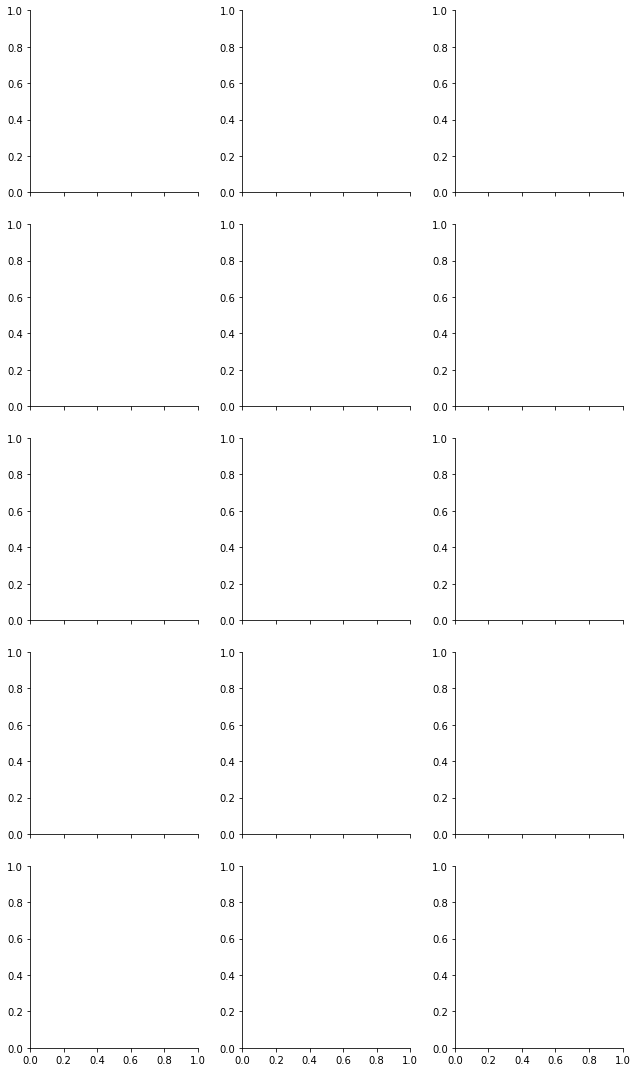

In [ ]:
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

In [ ]:
from gensim.utils import simple_preprocess

texts = df_corpus_v4["Review"].apply(simple_preprocess)
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]
from gensim import models

n_topics = 15

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)
lda_model.print_topics()

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.008*"495" + 0.008*"410" + 0.007*"736" + 0.006*"416" + 0.006*"381" + 0.006*"518" + 0.005*"439" + 0.005*"607" + 0.005*"514" + 0.004*"201"'),
 (1,
  '0.008*"410" + 0.008*"518" + 0.007*"0" + 0.006*"868" + 0.005*"588" + 0.005*"633" + 0.005*"495" + 0.005*"456" + 0.005*"201" + 0.004*"236"'),
 (2,
  '0.008*"736" + 0.007*"381" + 0.006*"410" + 0.005*"81" + 0.005*"495" + 0.005*"588" + 0.004*"416" + 0.004*"111" + 0.004*"201" + 0.004*"607"'),
 (3,
  '0.015*"410" + 0.006*"868" + 0.005*"0" + 0.005*"736" + 0.005*"315" + 0.005*"439" + 0.005*"381" + 0.004*"380" + 0.004*"106" + 0.004*"518"'),
 (4,
  '0.008*"736" + 0.008*"410" + 0.007*"439" + 0.006*"607" + 0.005*"81" + 0.005*"0" + 0.005*"416" + 0.005*"315" + 0.005*"518" + 0.004*"765"'),
 (5,
  '0.005*"518" + 0.005*"495" + 0.005*"494" + 0.005*"201" + 0.005*"755" + 0.005*"159" + 0.004*"736" + 0.004*"588" + 0.004*"410" + 0.004*"192"'),
 (6,
  '0.008*"495" + 0.008*"755" + 0.006*"588" + 0.005*"410" + 0.004*"736" + 0.004*"460" + 0.004*"518" + 0.004*"6

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

exception calling callback for <Future at 0x7f584f6313c8 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/pyLDAvis/__init__.py", line 44, in <module>
    from ._display import *
  File "/usr/local/lib/python3.6/dist-packages/pyLDAvis/_display.py", line 12, in <module>
    from ._prepare import PreparedData
  File "/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py", line 14, in <module>
    import pandas as pd
  File "/usr/local/lib/python3.6/dist-packages/pandas/__init__.py", line 22, in <module>
    from pandas.compat.numpy import (
  File "/usr/local/lib/p

BrokenProcessPool: ignored

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.0-py2.py3-none-any.whl size=136694 sha256=9642d692ea57b948b1f85c51b414929bff2da359821a79db291c3aae649607ff
  Stored in directory: /root/.cache/pip/wheels/5e/62/9d/e2d11b7e09f85508b7be451fa35a2bce4b12c66c10b8bcb182
Successfully built pyLDAvis


In [ ]:
corpus = gensim.corpora.textcorpus.TextCorpus(df_corpus_v4["Review"][0])

OSError: ignored